In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 80)
X teste =  (424610, 80)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
X_train50_train.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Destination_Port_Reserved,Destination_Port_User,Destination_Port_Private
1008718,100866871,10,8,1179,11595,385,0,117.900000,184.335112,5792,...,0.000000e+00,14016,14016,99300000.0,0.000000,99300000,99300000,1,0,0
1092907,119173647,578,1386,26428,2583295,1678,0,45.723183,237.512016,4388,...,9.433356e+05,1406375,72297,58831928.0,64000.234765,58877183,58786673,1,0,0
1034897,92349580,13,15,8531,7140,2645,0,656.230769,1136.872109,1460,...,1.502804e+06,2211812,86526,44982377.5,29559.184774,45003279,44961476,1,0,0
727692,99860659,9,6,310,11595,310,0,34.444444,103.333333,5792,...,0.000000e+00,2179,2179,99800000.0,0.000000,99800000,99800000,1,0,0
1200733,8035787,5,0,30,0,6,6,6.000000,0.000000,0,...,0.000000e+00,2002,2002,8033785.0,0.000000,8033785,8033785,1,0,0


In [6]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['DoS' 'BENIGN' 'DDoS' 'PortScan' 'BruteForce' 'BotNet' 'WebAttack'
 'Infiltration' 'Heartbleed']
[1 0]


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [10]:
import pickle

In [11]:
with open('df_cic_test50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 80)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [13]:
y_test50_multiclass.value_counts()

BENIGN          1136548
DoS              126330
PortScan          79464
DDoS              64013
BruteForce         6917
WebAttack          1089
BotNet              982
Infiltration         17
Heartbleed            5
Name: Label_multiclass, dtype: int64

In [14]:
y_test50_binary.value_counts()

0    1136548
1     278817
Name: Label_binary, dtype: int64

In [15]:
X_test50.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Destination_Port_Reserved,Destination_Port_User,Destination_Port_Private
0,117058676,23,30,844,27963,211,0,36.695652,66.387591,1904,...,118057.13400,403607,236649,5.810000e+07,1.865256e+05,58200000,58000000,1,0,0
1,3,2,0,12,0,6,6,6.000000,0.000000,0,...,0.00000,0,0,0.000000e+00,0.000000e+00,0,0,0,0,1
2,116201868,36,38,2485,39550,517,0,69.027778,150.122328,2897,...,66192.94888,252298,21996,9.641058e+06,1.317185e+06,10000000,5458526,1,0,0
3,7382149,8,6,56,11607,20,0,7.000000,5.656854,5840,...,0.00000,51900,51900,6.097168e+06,0.000000e+00,6097168,6097168,1,0,0
4,30795,1,1,77,159,77,77,77.000000,0.000000,159,...,0.00000,0,0,0.000000e+00,0.000000e+00,0,0,1,0,0


In [16]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['BENIGN' 'DDoS' 'PortScan' 'DoS' 'BruteForce' 'BotNet' 'WebAttack'
 'Infiltration' 'Heartbleed']
[0 1]


In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [18]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [19]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo RandomForest para Train e Validation - Train50

In [20]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [21]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [22]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [23]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [24]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9924966439791809

### Visualização da árvore binária

In [27]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

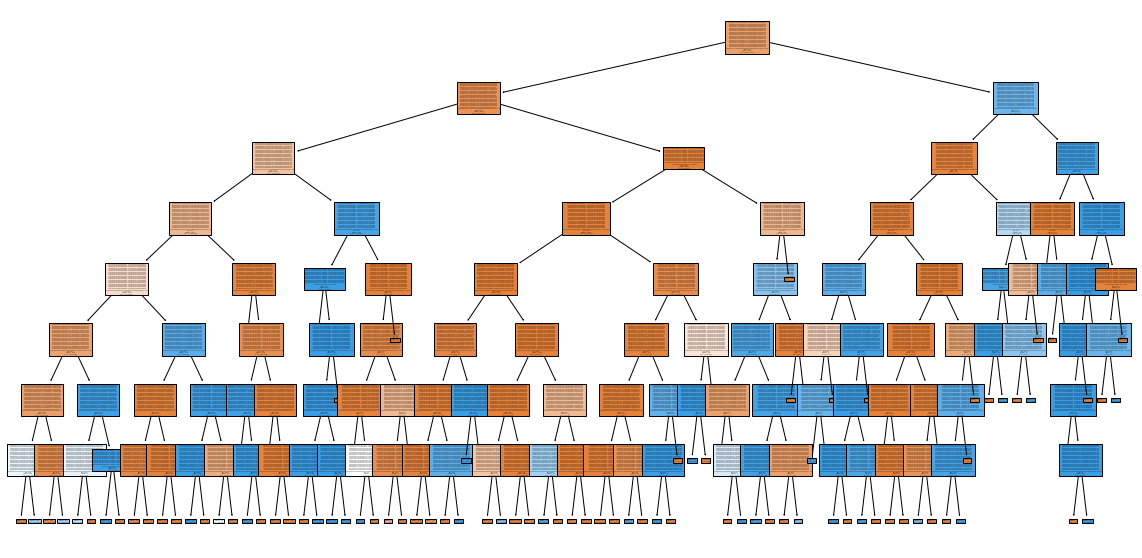

In [28]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [30]:
rforest_train50_binary.feature_importances_

array([0.00773656, 0.00737136, 0.00842737, 0.02319114, 0.03516185,
       0.02916765, 0.00791887, 0.01658093, 0.00603889, 0.02351821,
       0.00779669, 0.04574069, 0.07355821, 0.00438492, 0.00785332,
       0.00729451, 0.00792912, 0.00993433, 0.0021725 , 0.00449189,
       0.00765352, 0.02125746, 0.01358768, 0.00455896, 0.00262522,
       0.00158742, 0.00124788, 0.00166731, 0.00177794, 0.00132768,
       0.        , 0.        , 0.        , 0.01653988, 0.01063305,
       0.00817791, 0.00917921, 0.00353651, 0.04285813, 0.02890203,
       0.07668334, 0.05660848, 0.00081909, 0.00057417, 0.        ,
       0.01804602, 0.0133552 , 0.00686824, 0.        , 0.        ,
       0.00146568, 0.03759491, 0.02096521, 0.05656527, 0.0188642 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0135296 , 0.02074502, 0.00630119, 0.02955905,
       0.01931062, 0.01983053, 0.00817539, 0.01261532, 0.00214521,
       0.00090323, 0.00236638, 0.00238555, 0.00765525, 0.00066

In [31]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [32]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [33]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [34]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [35]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [36]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [37]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.991969101057441

### Visualização da árvore multiclasse

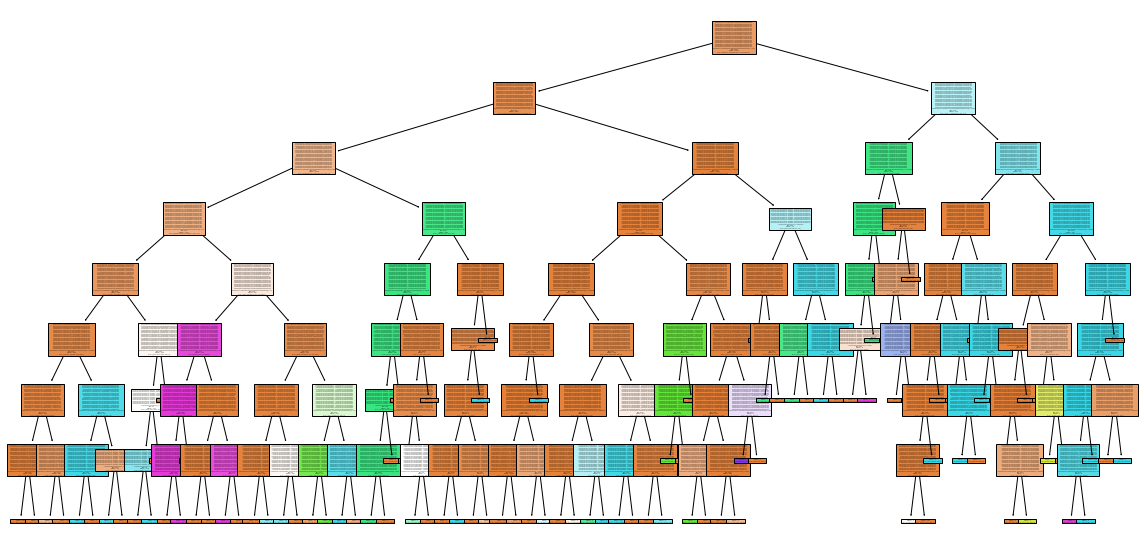

In [38]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [40]:
rforest_train50_multiclass.feature_importances_

array([1.03542109e-02, 5.46926610e-03, 8.06298697e-03, 3.40145276e-02,
       3.53034165e-02, 2.94133666e-02, 3.85149006e-03, 2.37812749e-02,
       8.75213072e-03, 2.34878462e-02, 1.01475118e-02, 4.78977790e-02,
       5.96301716e-02, 1.50666937e-02, 9.32682684e-03, 7.00299454e-03,
       9.78253870e-03, 1.62922226e-02, 1.76381433e-03, 7.33907939e-03,
       7.39588651e-03, 2.13660937e-02, 1.21873013e-02, 3.19099899e-03,
       2.51272495e-03, 2.16728656e-03, 2.55801322e-03, 1.90057149e-03,
       1.82803261e-03, 5.95434275e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.27927701e-02, 1.61890813e-02, 5.12856107e-03,
       1.99240167e-02, 6.39004562e-03, 3.39443079e-02, 2.32110297e-02,
       5.87920666e-02, 5.40508379e-02, 8.27632033e-04, 1.23814036e-03,
       0.00000000e+00, 1.60717327e-02, 1.39022073e-02, 1.17937650e-03,
       0.00000000e+00, 2.59015553e-07, 4.89939316e-04, 4.52728829e-02,
       1.70237319e-02, 4.79407820e-02, 1.81788410e-02, 0.00000000e+00,
      

In [41]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [42]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991252  0.999484  0.995351    341258
           1   0.997814  0.963888  0.980558     83352

    accuracy                       0.992497    424610
   macro avg   0.994533  0.981686  0.987955    424610
weighted avg   0.992540  0.992497  0.992447    424610



In [43]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.990533  0.999560  0.995026    341258
      BotNet   1.000000  0.030303  0.058824       264
  BruteForce   0.999022  0.994645  0.996828      2054
        DDoS   0.999202  0.997664  0.998433     18837
         DoS   0.996275  0.936276  0.965344     37992
  Heartbleed   1.000000  1.000000  1.000000         2
Infiltration   1.000000  0.000000  0.000000         6
    PortScan   1.000000  0.992704  0.996339     23849
   WebAttack   1.000000  0.000000  0.000000       348

    accuracy                       0.991969    424610
   macro avg   0.998337  0.661239  0.667866    424610
weighted avg   0.992018  0.991969  0.991193    424610



### Cross Validation do train50

In [44]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [45]:
score_cv_train50_binary

array([0.9929549 , 0.99282369, 0.99339901, 0.99245024, 0.99313658,
       0.99321726, 0.9926924 , 0.992541  , 0.99329801, 0.99218774])

In [46]:
cv_result_train50_binary

[0.992870083508026]

In [47]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [48]:
score_cv_train50_multiclass

array([0.99207679, 0.99216763, 0.99241996, 0.99145101, 0.99243005,
       0.99261166, 0.99202624, 0.99165279, 0.99245016, 0.9919455 ])

In [49]:
cv_result_train50_multiclass

[0.9921231788590059]

### Matriz de Confusão do train50

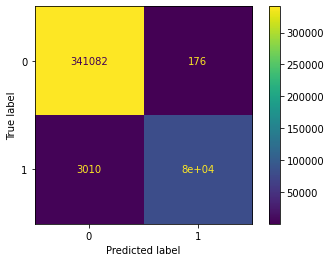

In [50]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

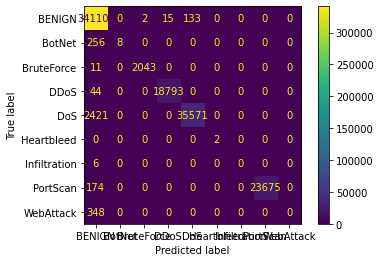

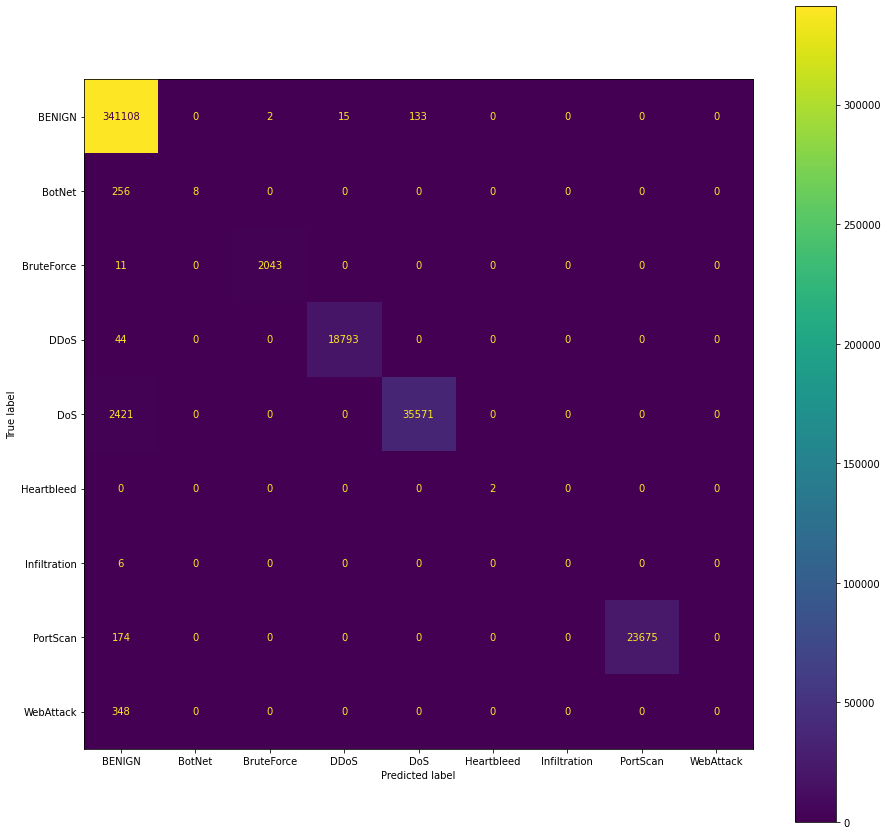

In [51]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [52]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [53]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9926626700533078

### Predição test50 multiclasse

In [56]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [57]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [58]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [59]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9921786959547537

### Precision e Recall do test50

In [60]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991503  0.999427  0.995450   1136548
           1   0.997587  0.965088  0.981068    278817

    accuracy                       0.992663   1415365
   macro avg   0.994545  0.982258  0.988259   1415365
weighted avg   0.992702  0.992663  0.992617   1415365



In [61]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.990799  0.999542  0.995151   1136548
      BotNet   1.000000  0.027495  0.053518       982
  BruteForce   0.999129  0.994940  0.997030      6917
        DDoS   0.999171  0.997938  0.998554     64013
         DoS   0.996129  0.939001  0.966722    126330
  Heartbleed   1.000000  1.000000  1.000000         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   1.000000  0.992248  0.996109     79464
   WebAttack   1.000000  0.000000  0.000000      1089

    accuracy                       0.992179   1415365
   macro avg   0.998359  0.661240  0.667454   1415365
weighted avg   0.992224  0.992179  0.991400   1415365



### Matriz de Confusão do test50

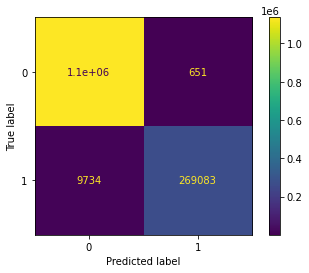

In [62]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

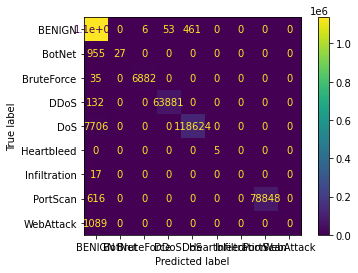

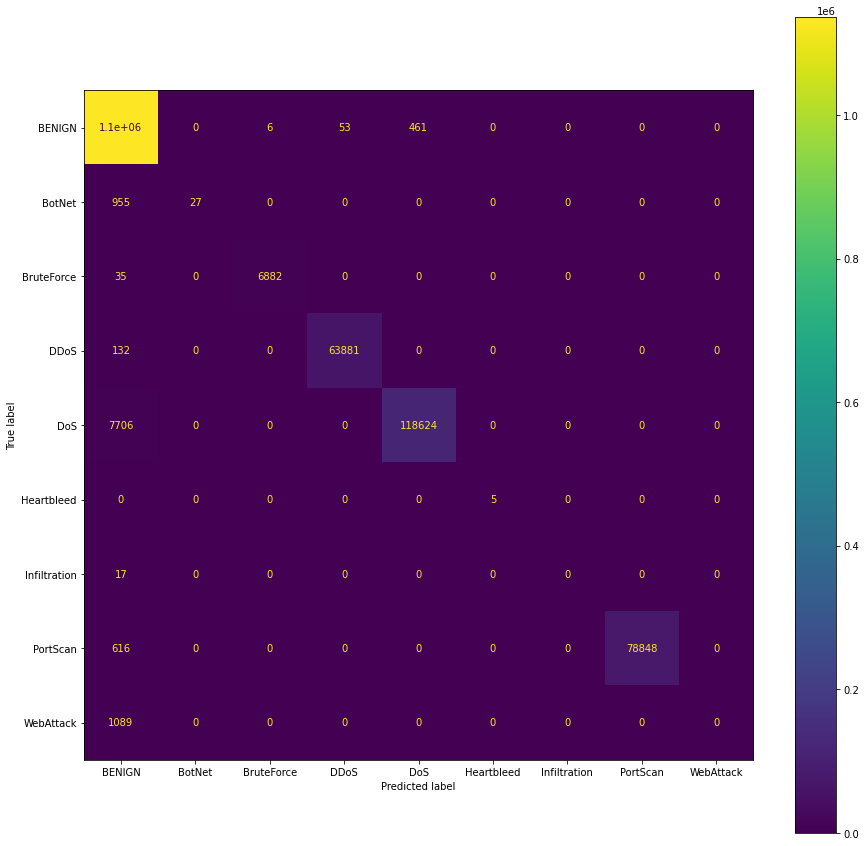

In [63]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)